In [2]:
from sklearn import svm
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.utils.multiclass import unique_labels
from sklearn import svm, metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import TruncatedSVD
from sklearn.gaussian_process.kernels import RBF
import scipy.sparse as sp
import numpy as np
import matplotlib.pyplot as plt
import generateverctor
from keras.models import load_model

Using TensorFlow backend.


['other' 'other' 'course' 'other' 'other' 'other' 'course' 'other' 'other'
 'course']
['course' 'course' 'course' 'course' 'course' 'course' 'course' 'course'
 'course' 'course']
Accuracy: 0.7156
0.622801272001451
0.7156286721504113
Confusion matrix, without normalization
[[ 10   0   0  33   0   0   0]
 [  0   0   0   0   0   0   1]
 [  0   0   1  30   0   0   1]
 [  6   0   2 591   0   0   8]
 [  0   0   0  20   0   0   0]
 [  0   0   0  21   0   0   0]
 [  0   0   0 120   0   0   7]]
Normalized confusion matrix
[[0.23 0.   0.   0.77 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.  ]
 [0.   0.   0.03 0.94 0.   0.   0.03]
 [0.01 0.   0.   0.97 0.   0.   0.01]
 [0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.94 0.   0.   0.06]]


D:\software\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


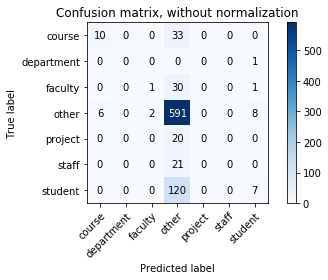

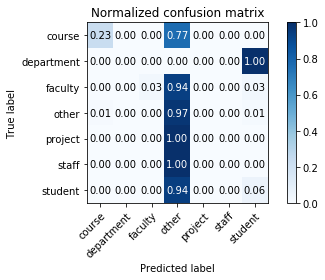

In [5]:
def svd(vectors):
    svd = TruncatedSVD(n_components=90)
    return svd.fit_transform(vectors)


def splitvector(vectors, labels, uni, testuni):
    # split vector and label to train and test
    idx = [i for i, x in enumerate(uni) if x == testuni]
    test_vector = vectors[idx]
    test_label = np.array(labels)[idx]
    if isinstance(vectors, sp.csr_matrix):
        train_vector = sp.csr_matrix(np.delete(vectors.toarray(), idx, 0))
    else:
        train_vector = sp.csr_matrix(np.delete(vectors, idx, 0))
    train_label = np.delete(labels, idx)
    return train_vector, train_label, test_vector, test_label


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    # classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


def svmclassfier(train_vector, train_label, test_vector):
    lin_clf = svm.LinearSVC()
    lin_clf.fit(train_vector, train_label)
    predict = lin_clf.predict(test_vector)
    return predict



def lrclassifier(train_vector, train_label, test_vector):
    lr_clf = LogisticRegression()
    lr_clf.fit(train_vector, train_label)
    predict = lr_clf.predict(test_vector)
    return predict

def autoencoder(vectors):
    encoder = load_model('my_encoder.h5')
    return encoder.predict(vectors)


if __name__ == '__main__':
    classes = ["course", "department", "faculty", "other", "project", "staff", "student"]
    vectors, labels, uni, filename, features = generateverctor.tfidf()
#     vectors = svd(vectors)
    vectors = autoencoder(vectors)
    train_vector, train_label, test_vector, test_label = splitvector(vectors, labels, uni, "cornell")
    predict = svmclassfier(train_vector, train_label, test_vector)
#     predict = lrclassifier(train_vector, train_label, test_vector)
    # print(vectors.shape, train_vector.shape, len(train_label), test_vector.shape, len(test_label))
    # print(set(predict))
    # print(set(test_label))
    print(predict[0:10])
    print(test_label[0:10])
    print('Accuracy: {:.4f}'.format(metrics.accuracy_score(test_label, predict)))
    print(precision_score(test_label, predict, average='weighted'))
    print(recall_score(test_label, predict, average='weighted'))

    np.set_printoptions(precision=2)
    # Plot non-normalized confusion matrix
    plot_confusion_matrix(test_label, predict, classes=classes,
                          title='Confusion matrix, without normalization')
    # Plot normalized confusion matrix
    plot_confusion_matrix(test_label, predict, classes=classes, normalize=True,
                          title='Normalized confusion matrix')
    plt.show()